In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('GOOG.csv')
data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [3]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [7]:
data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [10]:
data.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [11]:
data.shape

(1258, 14)

In [12]:
data.size

17612

In [13]:
data.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6416\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
close,1.000000,0.999528,0.999586,0.999083,-0.025574,1.000000,0.999528,0.999586,0.999083,-0.025574,NaN,NaN
high,0.999528,1.000000,0.999354,0.999575,-0.012470,0.999528,1.000000,0.999354,0.999575,-0.012470,NaN,NaN
low,0.999586,0.999354,1.000000,0.999499,-0.035184,0.999586,0.999354,1.000000,0.999499,-0.035184,NaN,NaN
open,0.999083,0.999575,0.999499,1.000000,-0.021381,0.999083,0.999575,0.999499,1.000000,-0.021381,NaN,NaN
volume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,NaN,NaN
adjClose,1.000000,0.999528,0.999586,0.999083,-0.025574,1.000000,0.999528,0.999586,0.999083,-0.025574,NaN,NaN
adjHigh,0.999528,1.000000,0.999354,0.999575,-0.012470,0.999528,1.000000,0.999354,0.999575,-0.012470,NaN,NaN
adjLow,0.999586,0.999354,1.000000,0.999499,-0.035184,0.999586,0.999354,1.000000,0.999499,-0.035184,NaN,NaN
adjOpen,0.999083,0.999575,0.999499,1.000000,-0.021381,0.999083,0.999575,0.999499,1.000000,-0.021381,NaN,NaN
adjVolume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,-0.025574,-0.012470,-0.035184,-0.021381,1.000000,NaN,NaN


In [15]:
data['date'] = pd.to_datetime(data['date'])

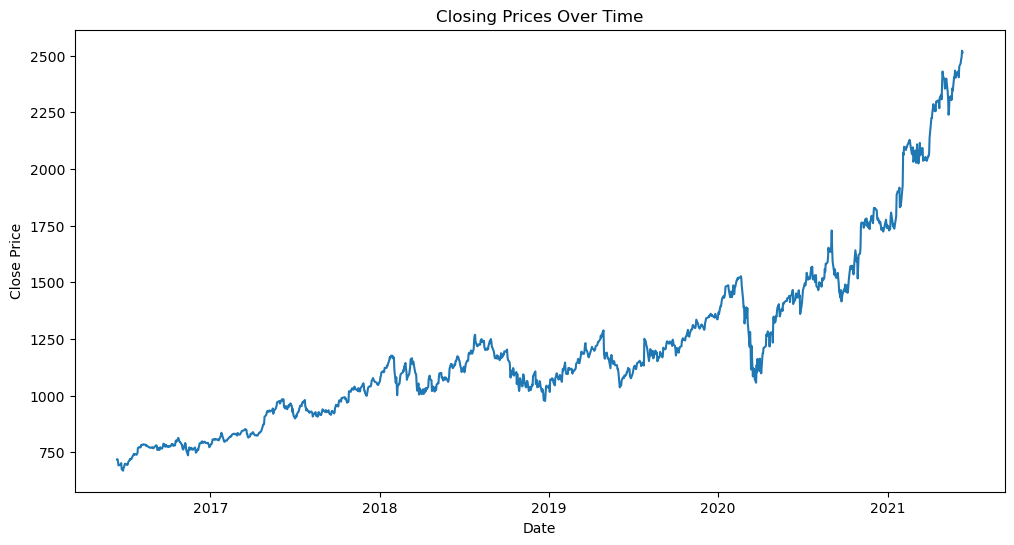

In [16]:
# Line plot of closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close', data=data)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


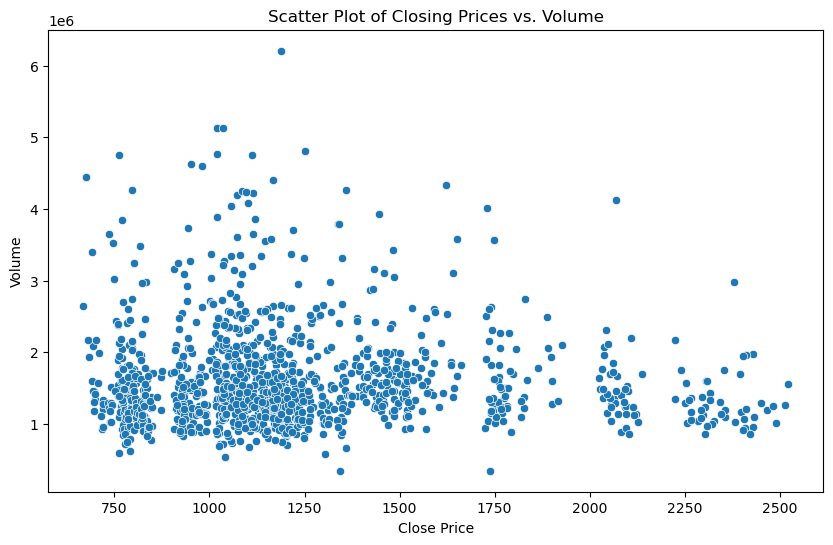

In [17]:
# Scatter plot of closing prices against volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='close', y='volume', data=data)
plt.title('Scatter Plot of Closing Prices vs. Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()

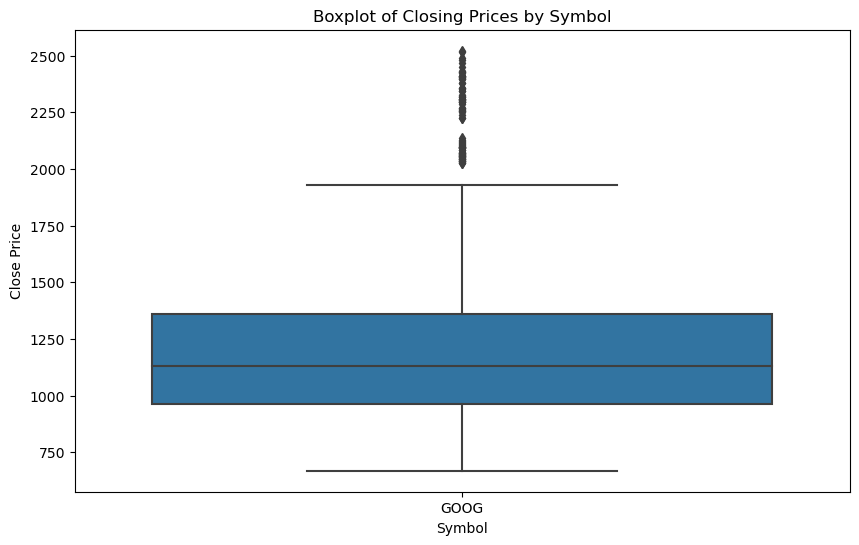

In [18]:
# Boxplot of closing prices by symbol
plt.figure(figsize=(10, 6))
sns.boxplot(x='symbol', y='close', data=data)
plt.title('Boxplot of Closing Prices by Symbol')
plt.xlabel('Symbol')
plt.ylabel('Close Price')
plt.show()


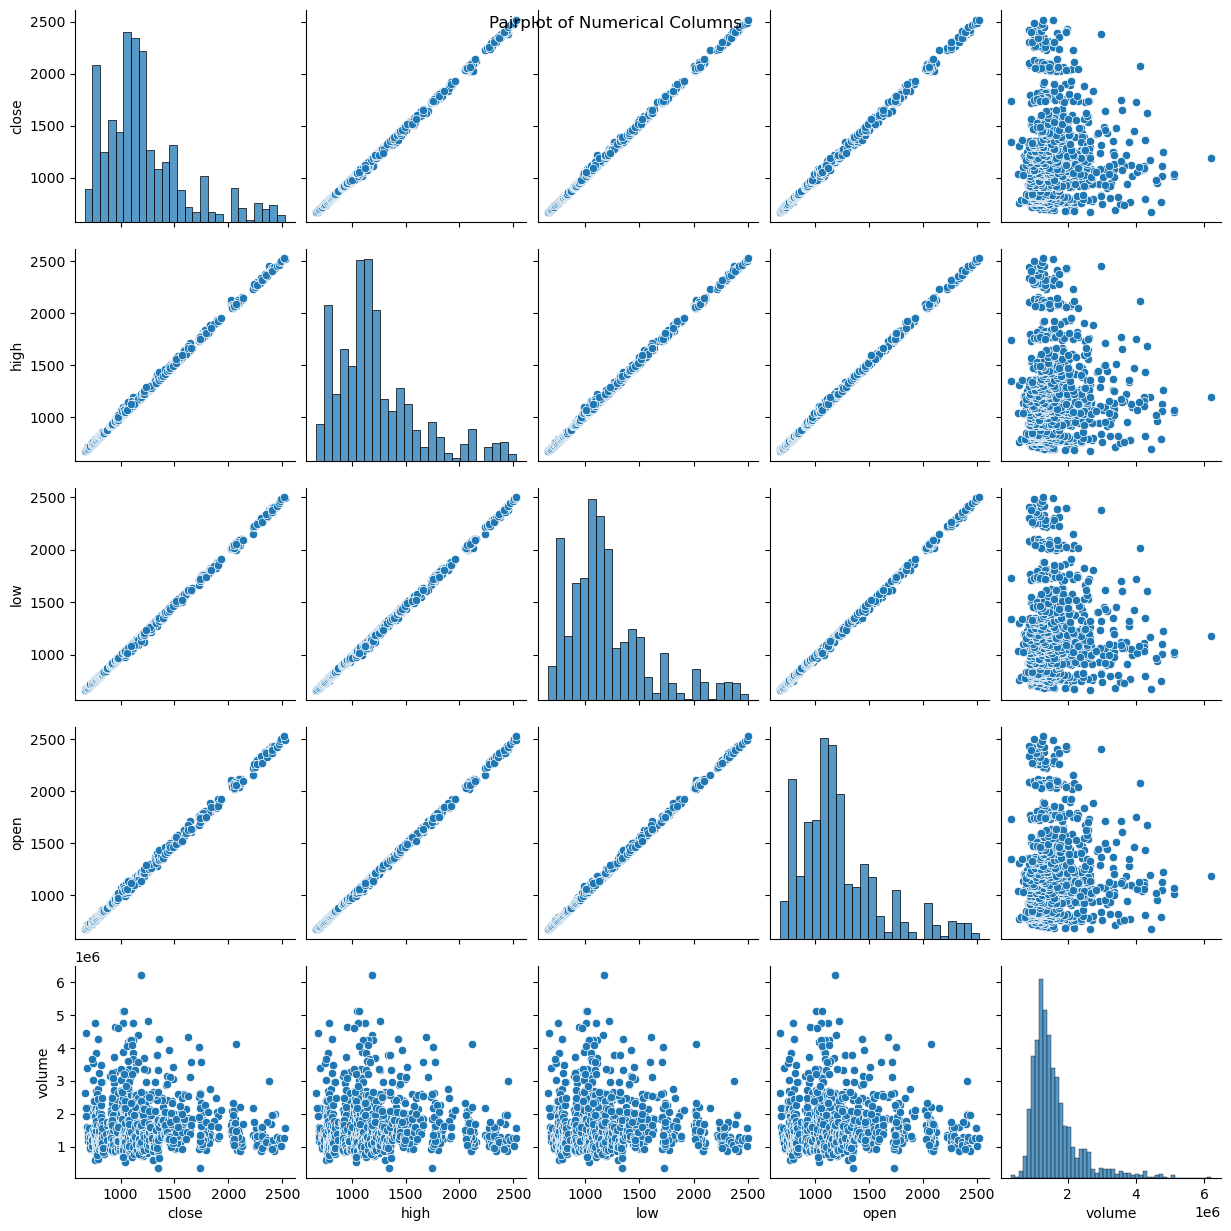

In [20]:
# Pairplot for numerical columns
sns.pairplot(data[['close', 'high', 'low', 'open', 'volume']])
plt.suptitle('Pairplot of Numerical Columns')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6416\2940157895.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


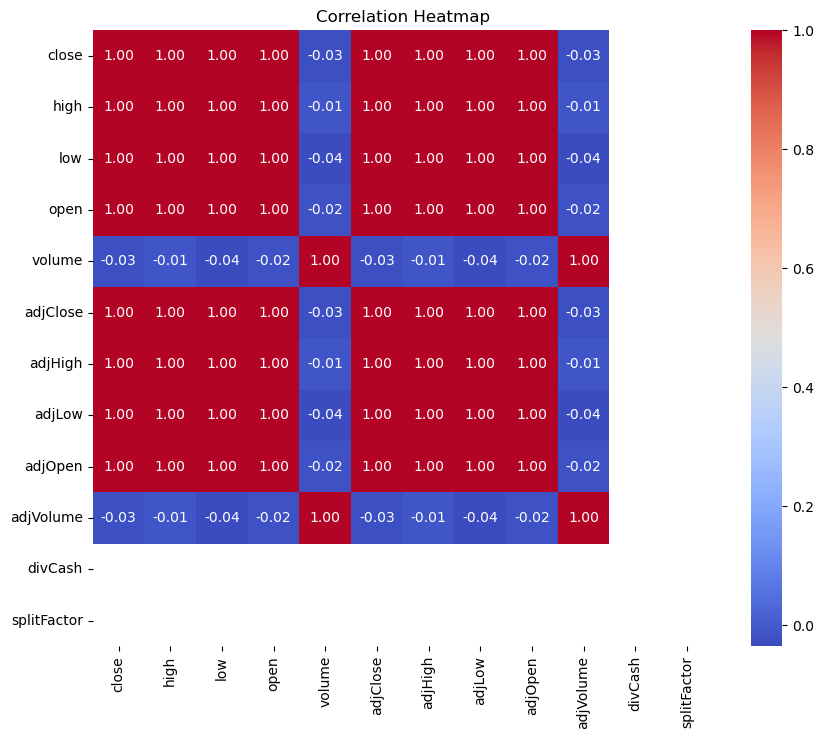

In [21]:
# Heatmap of correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

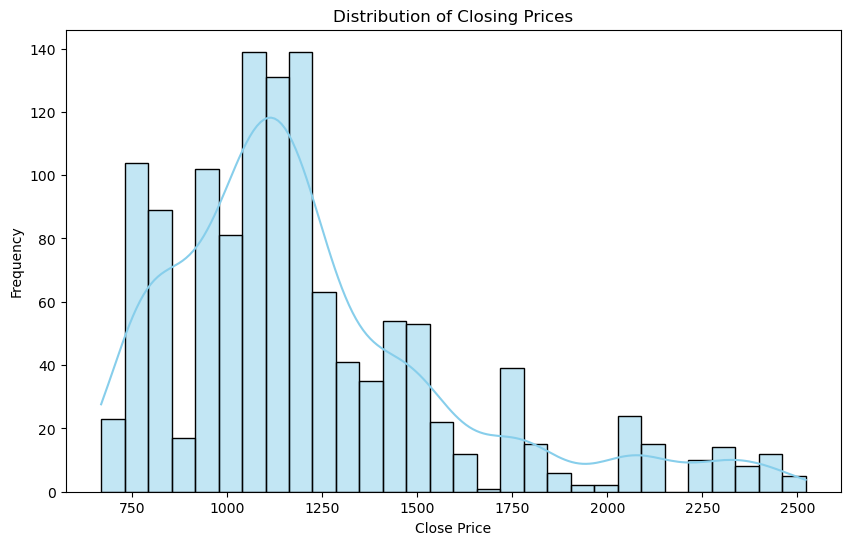

In [22]:
# Distribution of Closing Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['close'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

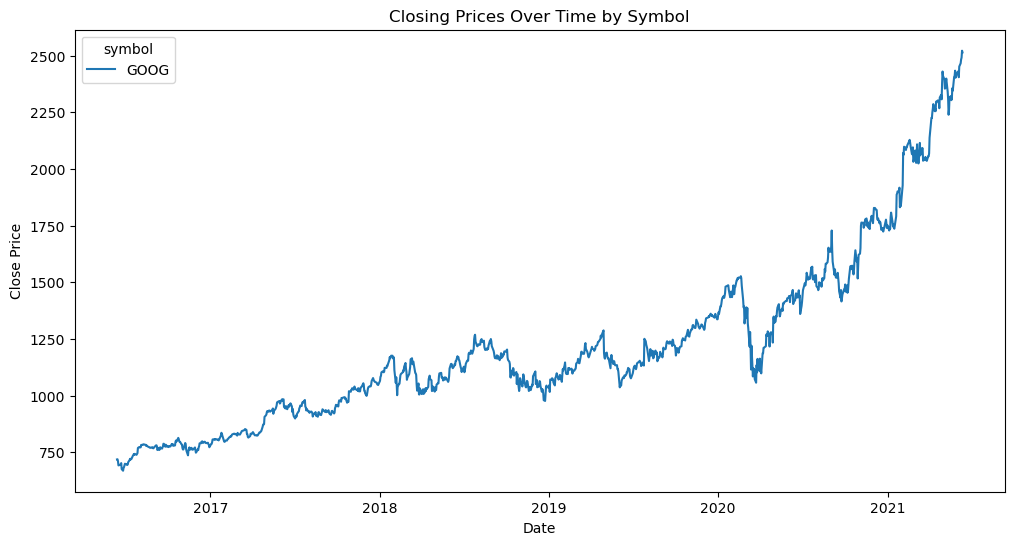

In [23]:
# Line plot of closing prices over time for each symbol
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close', hue='symbol', data=data)
plt.title('Closing Prices Over Time by Symbol')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

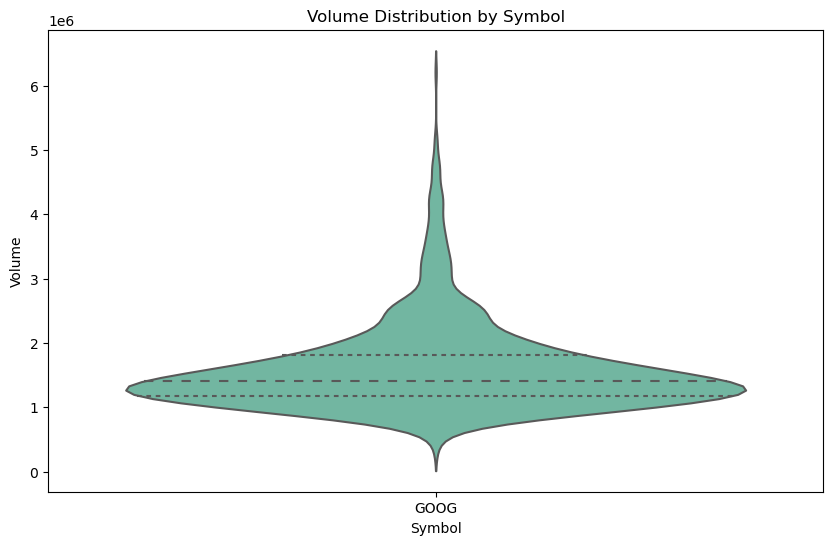

In [24]:
# Violin plot of volume distribution by symbol
plt.figure(figsize=(10, 6))
sns.violinplot(x='symbol', y='volume', data=data, inner='quartile', palette='Set2')
plt.title('Volume Distribution by Symbol')
plt.xlabel('Symbol')
plt.ylabel('Volume')
plt.show()

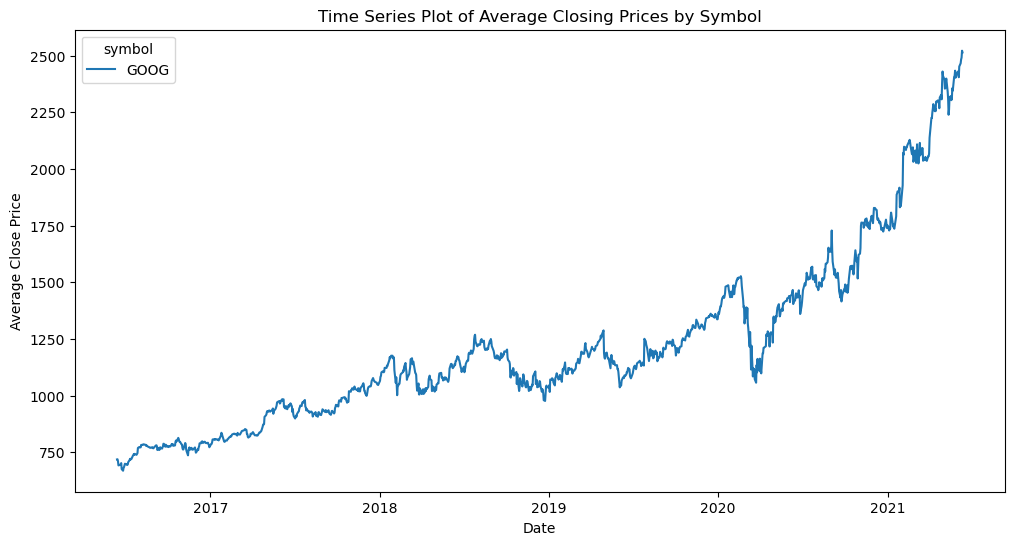

In [25]:
# Time series plot of average closing prices by symbol
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close', hue='symbol', data=data.groupby(['symbol', 'date']).mean().reset_index())
plt.title('Time Series Plot of Average Closing Prices by Symbol')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.show()

<Figure size 1200x800 with 0 Axes>

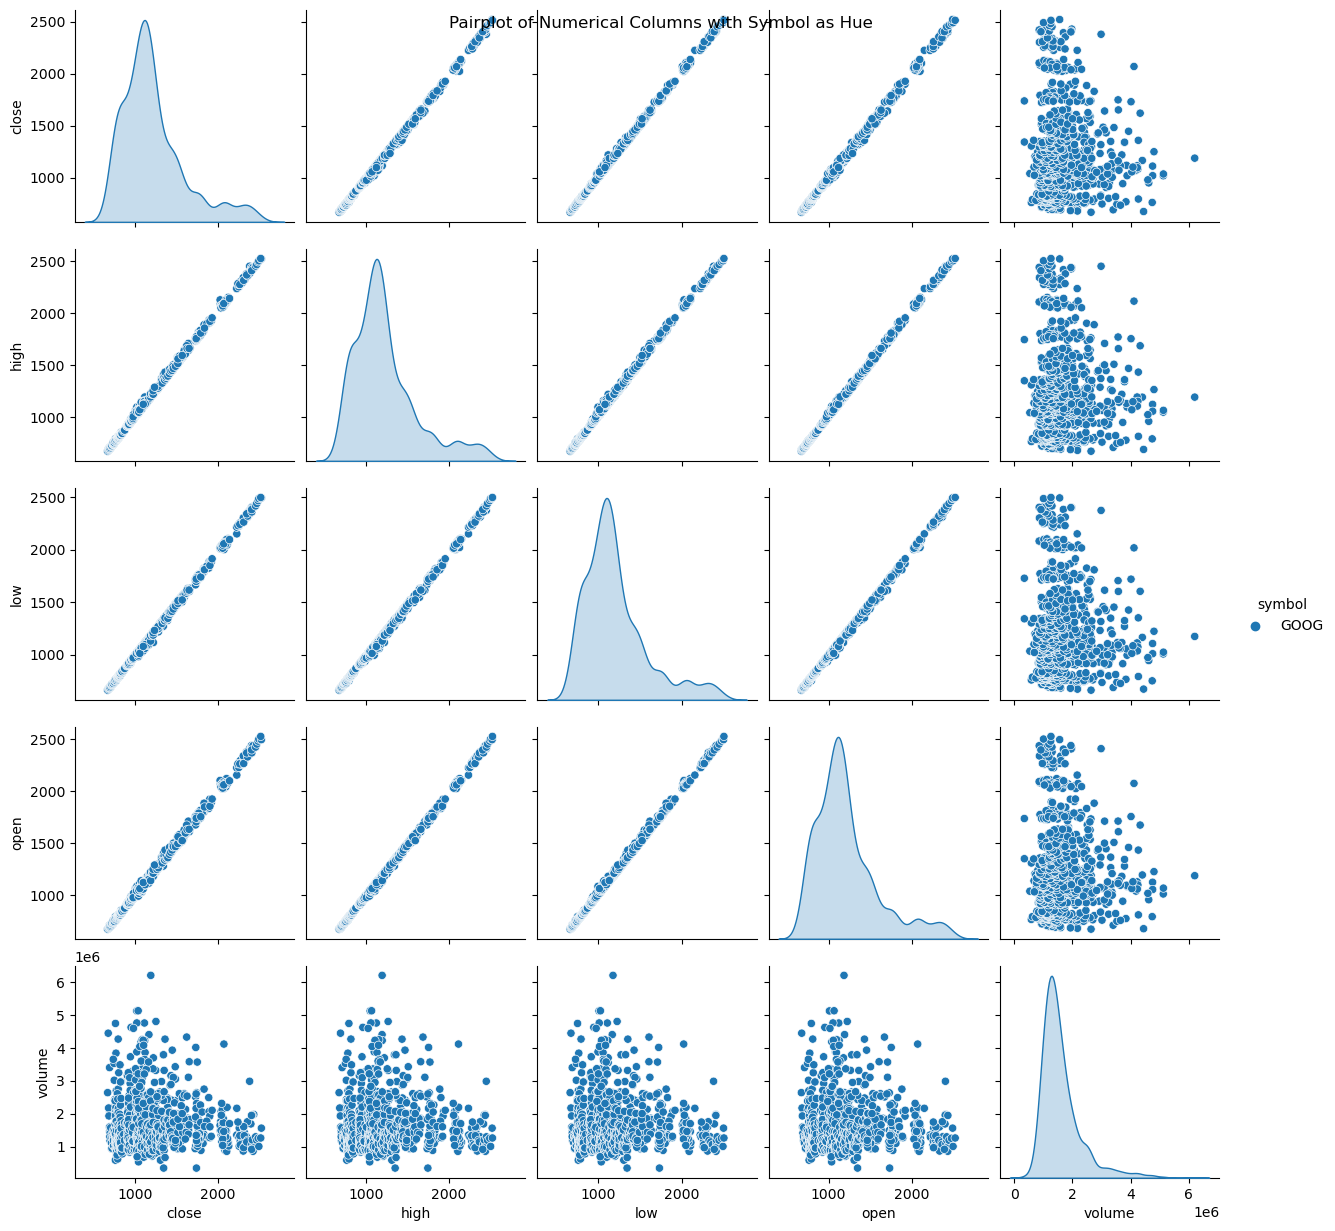

In [30]:
# Pairplot of numerical columns with hue based on symbol
plt.figure(figsize=(12, 8))
sns.pairplot(data[['close', 'high', 'low', 'open', 'volume', 'symbol']], hue='symbol', markers='o')
plt.suptitle('Pairplot of Numerical Columns with Symbol as Hue')
plt.show()

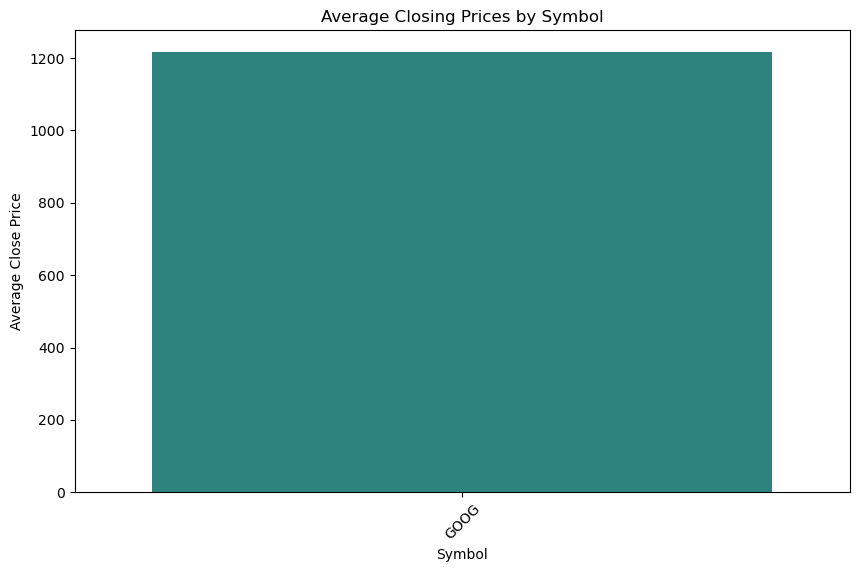

In [31]:
# Bar plot of average closing prices by symbol
average_close_by_symbol = data.groupby('symbol')['close'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_close_by_symbol.index, y=average_close_by_symbol.values, palette='viridis')
plt.title('Average Closing Prices by Symbol')
plt.xlabel('Symbol')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.show()

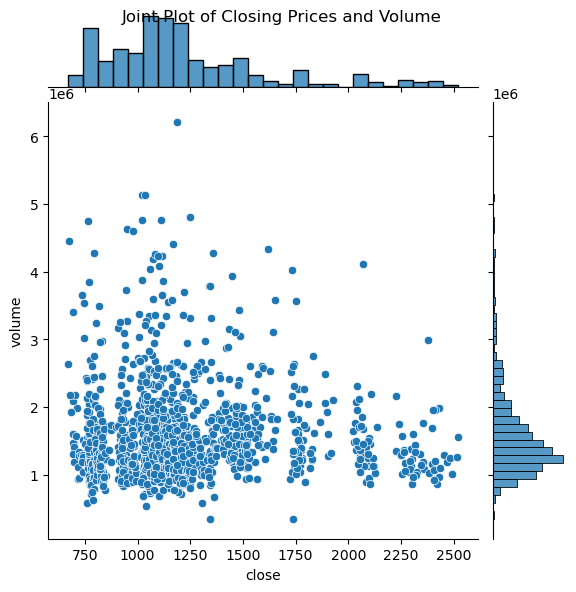

In [33]:
# Joint plot of closing prices and volume
sns.jointplot(x='close', y='volume', data=data, kind='scatter')
plt.suptitle('Joint Plot of Closing Prices and Volume')
plt.show()

In [34]:
#RandomForest algorithm
data['lag_close'] = data['close'].shift(1)

In [35]:
# Drop rows with missing values
data.dropna(inplace=True)


In [37]:
# Train-Test Split
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]


In [38]:
# Features and Target
X_train, y_train = train_data[['lag_close']], train_data['close']
X_test, y_test = test_data[['lag_close']], test_data['close']


In [41]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
# Model Evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 204803.2340673928


In [44]:
# Future Price Prediction (Example: Predicting next day's closing price)
next_day_feature =data[['close']].iloc[-1].values.reshape(1, -1)
next_day_prediction = model.predict(next_day_feature)
print(f'Predicted Next Day Closing Price: {next_day_prediction[0]}')


Predicted Next Day Closing Price: 1518.9389999999987


C:\Users\Dell\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


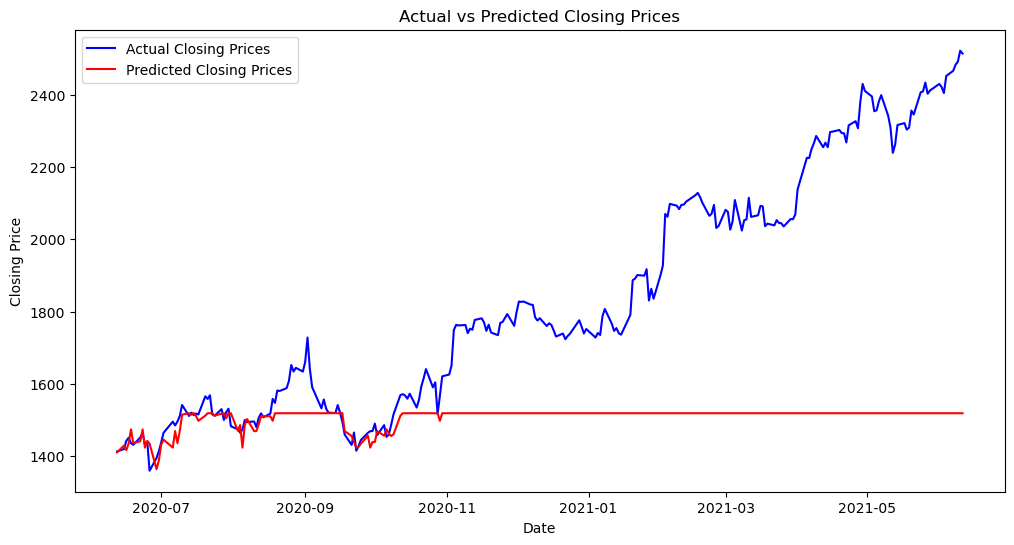

In [45]:
# Plotting Actual vs Predicted Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(test_data['date'], y_test, label='Actual Closing Prices', color='blue')
plt.plot(test_data['date'], predictions, label='Predicted Closing Prices', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()